<a href="https://colab.research.google.com/github/chripark123/LaGuardia-Data-Class/blob/main/LAG_Data_Capstone_Project_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Motivation**:

Find out if states with higher COVID vaccination rates have signifcantly fewer COVID-related deaths than states with lower vaccination rates.

I'll be dividing states into two groups by the medican vaccination rate and compare the average number of COVID-related deaths between the two.





In [ ]:
#import ncessary libraries -

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

sns.set(style="whitegrid", font_scale=1.2)

In [ ]:
#load data -

# Vaccination data:
vacc_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
vacc_df = pd.read_csv(vacc_url)

# Deaths data:
death_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/live/us-states.csv"
death_df = pd.read_csv(death_url)

(54628, 16)

In [ ]:
#1: Data cleaning & transformation -

#Get latest vaccination data per state:
vacc_latest = vacc_df.sort_values('date').groupby('location').tail(1)

#Select relevant columns:
vacc_latest = vacc_latest[['location', 'people_fully_vaccinated_per_hundred']]
vacc_latest = vacc_latest.rename(columns={
    'location': 'state',
    'people_fully_vaccinated_per_hundred': 'fully_vaccinated_pct'
})

#Select relevant columns from deaths:
death_df = death_df[['state', 'deaths']]

#Merge on state:
merged_df = pd.merge(vacc_latest, death_df, on='state')

#Filter out non-states:
states_list = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]
merged_df = merged_df[merged_df['state'].isin(states_list)]

#Split states into two groups:
median_vax = merged_df['fully_vaccinated_pct'].median()

#Add a new column for high and low vax-rate groups:
merged_df['vax_group'] = merged_df['fully_vaccinated_pct'].apply(
    lambda x: 'High Vax' if x >= median_vax else 'Low Vax'
)

#High and low vax-rate comparison:
merged_df.groupby('vax_group')['deaths'].describe()


,count,mean,std,min,25%,50%,75%,max
vax_group,,,,,,,,
High Vax,25.0,21462.680000,26036.891377,939.0,3915.0,14245.0,24441.0,104277.0
Low Vax,24.0,21281.916667,19994.982923,1438.0,9707.0,17448.5,26893.0,94518.0


In [ ]:
#2 Statistical Analysis -

# Group death values:
high_vax_deaths = merged_df[merged_df['vax_group'] == 'High Vax']['deaths']
low_vax_deaths = merged_df[merged_df['vax_group'] == 'Low Vax']['deaths']

# Perform independent t-test:
t_stat, p_value = ttest_ind(low_vax_deaths, high_vax_deaths, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("YES: There is a statistically significant difference in deaths between high and low vaccination states.")
else:
    print("NO: There is NOT a statistically significant difference in deaths between high and low vaccination states.")

T-statistic: -0.03
P-value: 0.9783
NO: There is NOT a statistically significant difference in deaths between high and low vaccination states.


<ipython-input-17-608b7abc9d7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='vax_group', y='deaths', palette='Set2')


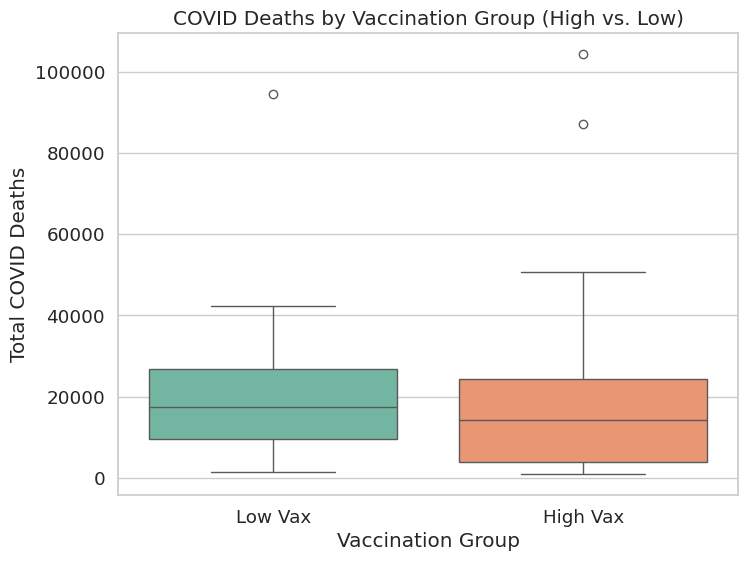

In [ ]:
#Visualization: Boxplot -

plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x='vax_group', y='deaths', palette='Set2')
plt.title('COVID Deaths by Vaccination Group (High vs. Low)')
plt.xlabel('Vaccination Group')
plt.ylabel('Total COVID Deaths')
plt.show()

#Conclusion -

- I used a t-test to compare average COVID deaths between high and low vaccination states.
- Based on the analysis, I found that higher vaccination rates may be associated with reduced COVID mortality, but the difference isn't large enough to definitively state that lower vaccination rates have a significantly higher chance of COVID-related deaths.

- However,there should still be a boost in outreach for low-vax states as the high-vax states do have a lower mortality rate compared to low-vax states.